In [2]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

# Fire rate / current external

In [3]:
rates, currents, CV, v_soma = [], [], {}, {}

for batch_number in range(1,21):
    batch_number = str(batch_number).zfill(4)

    for current in range(5):
        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        time = data['simData']['t']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']


        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

for batch_number in range(1,14):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

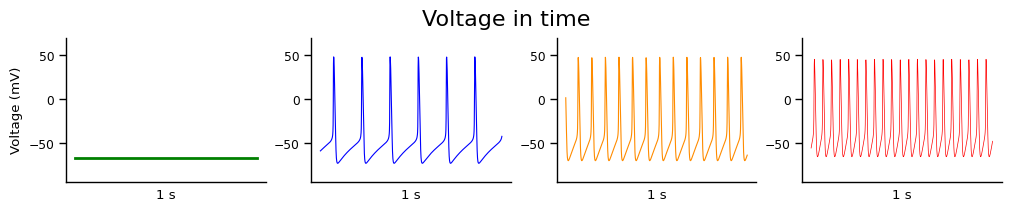

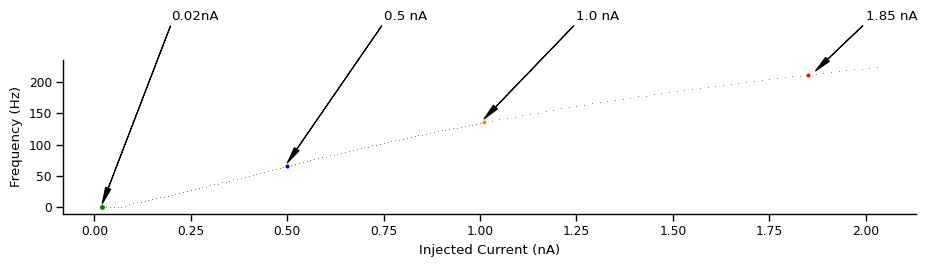

In [4]:

f, ax = plt.subplots(1,4, figsize=(10,2), layout='constrained')
f.suptitle('Voltage in time', fontsize=16)
ax0, ax1, ax2, ax3 = ax
sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)
#ax0.set_title(f'0.02 nA', fontsize=14)
sns.lineplot(x = time[-1000:], y = v_soma[0.5][-1000:], color='blue', ax=ax1, linewidth=0.8)
#ax1.set_title(f'0.5 nA', fontsize=12)
sns.lineplot(x = time[-1000:], y = v_soma[1.0][-1000:], color='darkorange', ax=ax2, linewidth=0.8)
#ax2.set_title('1.0 nA', fontsize=14)

sns.lineplot(x = time[-1000:], y = v_soma[1.85][-1000:], color='red', ax=ax3, linewidth=0.5)
#ax3.set_title('1.85 nA')

ax0.set_ylabel('Voltage (mV)')
for axis in ax:
    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel('1 s')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)



plt.show()

f, ax = plt.subplots(1,1, figsize=(11,2)) #figsize=(12,2))
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
delta = 5

#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.005))
sns.scatterplot(x = currents, y = rates, color='black', s=0.4, ax=ax)

sns.scatterplot(x = currents[:1], y = rates[:1], color='green', s=15, ax=ax)
ax.annotate('0.02nA', xy=( currents[0], rates[0]+delta), xytext=(0.2, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[48:49], y = rates[48:49], color='blue', s=10, ax=ax)
ax.annotate('0.5 nA', xy=( currents[48], rates[48]+delta), xytext=(0.75, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[99:100], y = rates[99:100], color='darkorange', s=10, ax=ax)
ax.annotate('1.0 nA', xy=( currents[99], rates[99]+delta), xytext=(1.25, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[142:143], y = rates[142:143], color='red', s=10, ax=ax)
ax.annotate('1.85 nA', xy=(currents[143], rates[143]+delta), xytext=(2., 300), arrowprops=arrowprops)

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Injected Current (nA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [5]:
for i in range(20):
    print(f'({currents[i]:.3f} nA, {rates[i]:.3f} Hz)')

(0.020 nA, 0.000 Hz)
(0.030 nA, 0.000 Hz)
(0.040 nA, 0.000 Hz)
(0.050 nA, 0.667 Hz)
(0.060 nA, 0.667 Hz)
(0.070 nA, 0.667 Hz)
(0.080 nA, 1.333 Hz)
(0.090 nA, 4.667 Hz)
(0.100 nA, 6.000 Hz)
(0.110 nA, 7.333 Hz)
(0.120 nA, 8.667 Hz)
(0.130 nA, 10.000 Hz)
(0.140 nA, 11.333 Hz)
(0.150 nA, 12.667 Hz)
(0.160 nA, 14.000 Hz)
(0.170 nA, 15.333 Hz)
(0.180 nA, 16.667 Hz)
(0.190 nA, 18.000 Hz)
(0.200 nA, 19.533 Hz)
(0.210 nA, 21.333 Hz)


Note que ocorre disparos a partir de $0.5nA$.

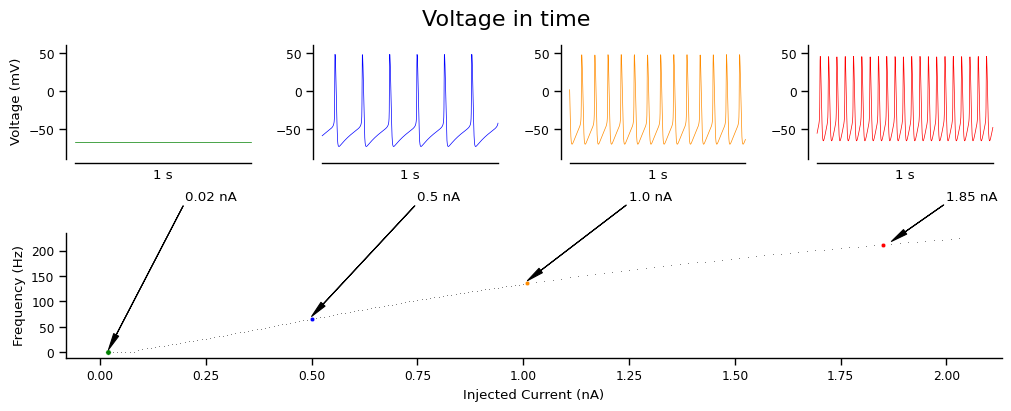

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=(10,4))
gs = GridSpec(2, 4, figure=fig,) #height_ratios=)

# voltage plot
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax = [ax0,ax1,ax2,ax3]
#sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)

amps = [0.02, 0.5, 1.0, 1.85]
color = ['green','blue','darkorange','red']
ax0.set_ylabel('Voltage (mV)')

for i, axis in enumerate(ax):
    t = np.array(time[-1000:])
    v = np.array(v_soma[amps[i]][-1000:])
    sns.lineplot(x = t, y = v, color=color[i], ax=axis, linewidth=0.5)

    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel('1 s')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)

    axis.spines.bottom.set_bounds(t.min(), t.max())
    axis.spines.left.set_bounds(-90, 60)
    

# frequency/current plot
ax5 = fig.add_subplot(gs[1, :])
#ax5.set_ylim(-90, 50)
#sns.lineplot(x = time[-100:], y = v_soma[0.02][-100:], color='green', ax=ax5, linewidth=2)
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
delta = 5

#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.005))
sns.scatterplot(x = currents, y = rates, color='black', s=0.4, ax=ax5)

sns.scatterplot(x = currents[:1], y = rates[:1], color='green', s=15, ax=ax5)
ax5.annotate('0.02 nA', xy=( currents[0], rates[0]+delta), xytext=(0.2, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[48:49], y = rates[48:49], color='blue', s=10, ax=ax5)
ax5.annotate('0.5 nA', xy=( currents[48], rates[48]+delta), xytext=(0.75, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[99:100], y = rates[99:100], color='darkorange', s=10, ax=ax5)
ax5.annotate('1.0 nA', xy=( currents[99], rates[99]+delta), xytext=(1.25, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[142:143], y = rates[142:143], color='red', s=10, ax=ax5)
ax5.annotate('1.85 nA', xy=(currents[143], rates[143]+delta), xytext=(2., 300), arrowprops=arrowprops)

ax5.set_ylabel('Frequency (Hz)')
ax5.set_xlabel('Injected Current (nA)')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

fig.suptitle('Voltage in time', fontsize=16)
#format_axes(fig)

path_figures = '../figures/'
fname = f'Voltage in time one Neuron'.replace(' ','_')
plt.savefig(path_figures + fname + '.png')

plt.show()

# Analyse raster plot

In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

datas = {}
for batch in range(1,7):
    batch = str(batch).zfill(4)
    for current in range(4):
        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_data.pkl', 'rb') as f:
                data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']
            datas[f'{amp}_{gex}'] = data
        except:
            print(f'Error: to read {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_CV.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['CV'] = data
        except:
            print(f'Error: to read CV {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_rate.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['rate'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

        try:
            with open(f'../data/v2_batch{batch}/v2_batch{batch}_0_{current}_sync.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['sync'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

Error: to read 0006_3
Error: to read CV 0006_3
Error: to read rate 0006_3
Error: to read rate 0006_3


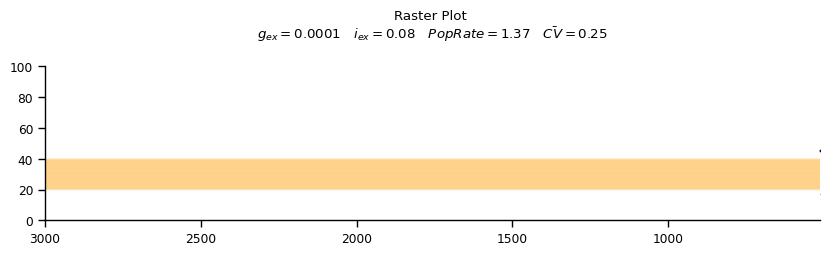

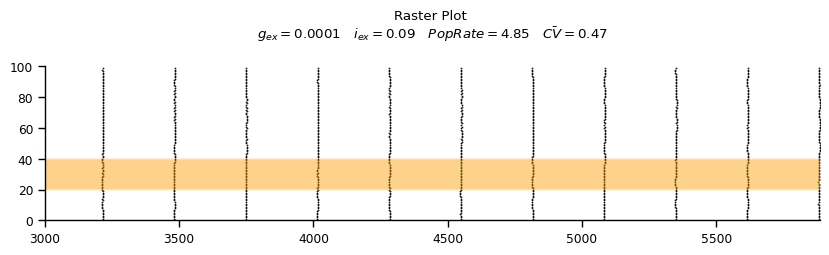

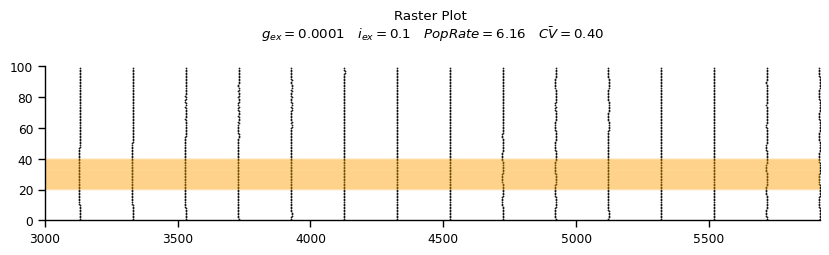

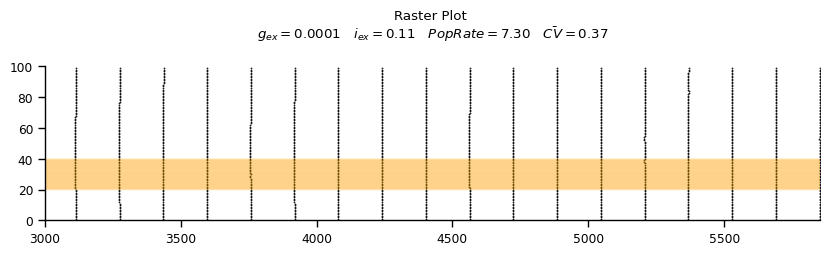

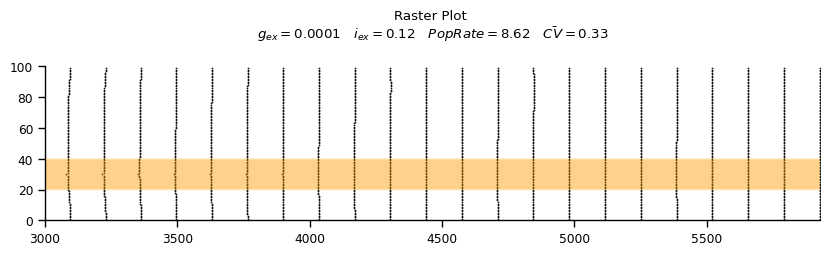

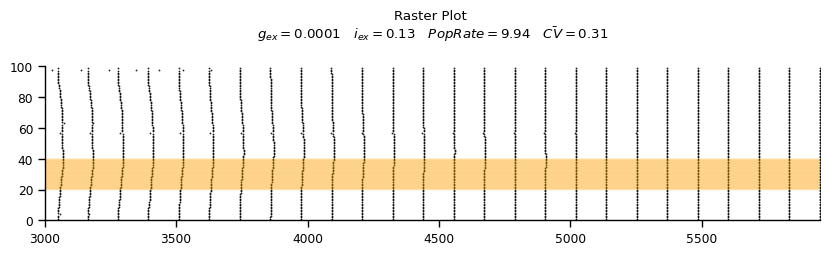

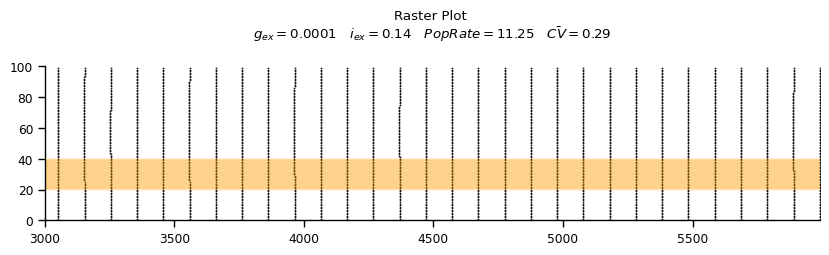

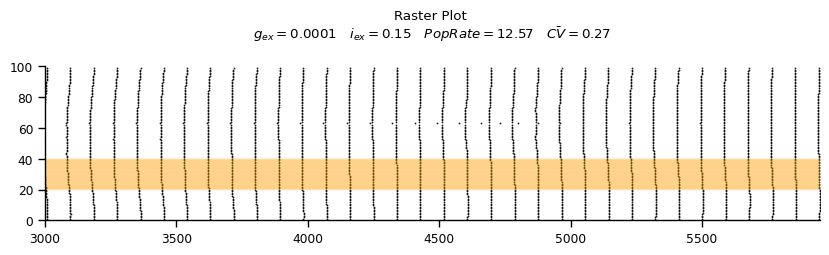

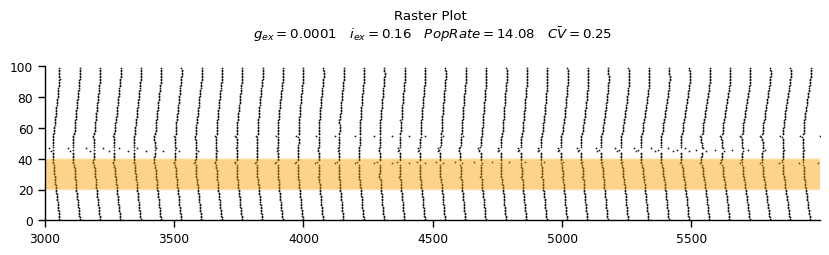

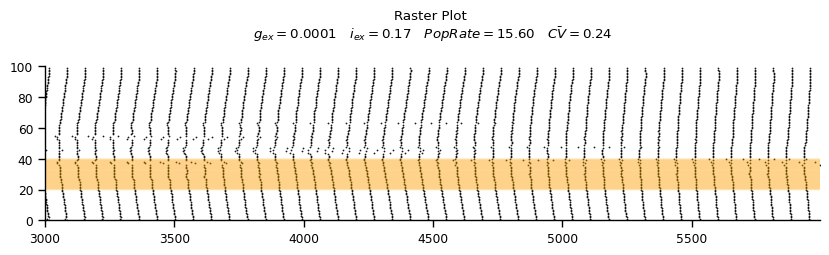

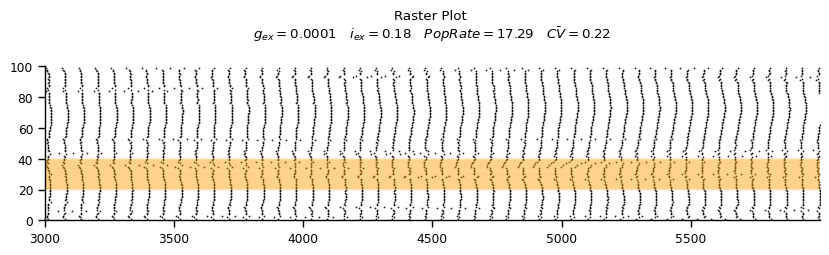

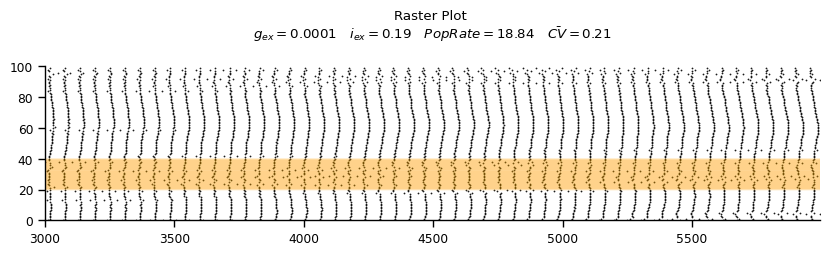

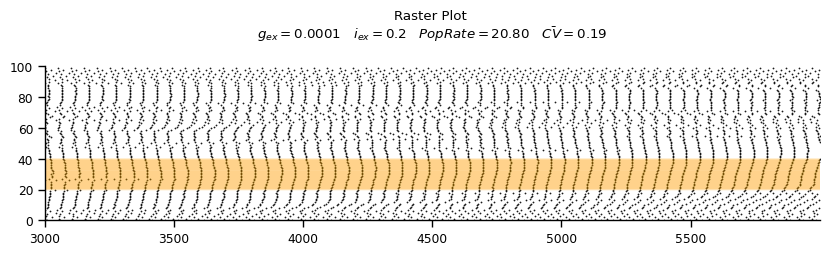

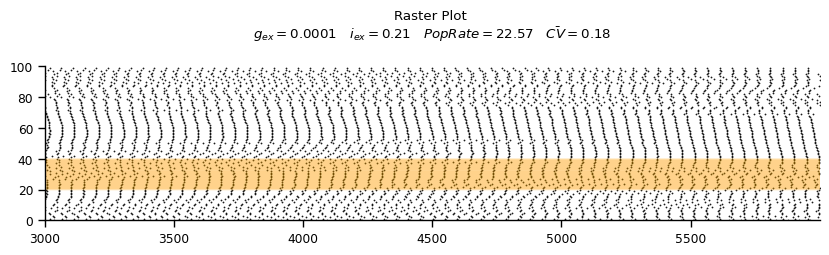

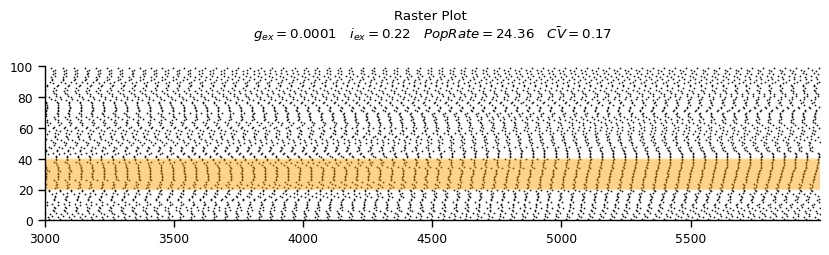

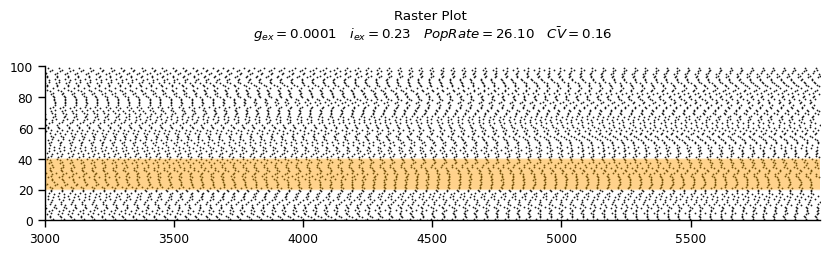

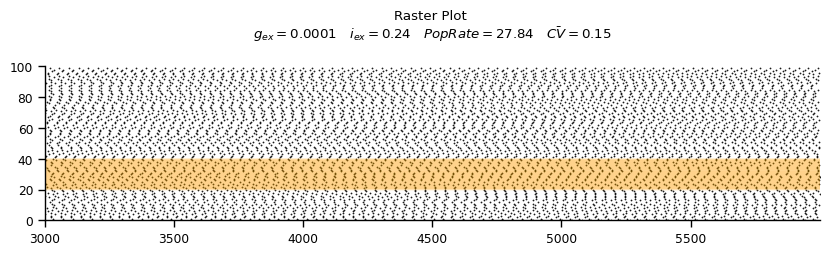

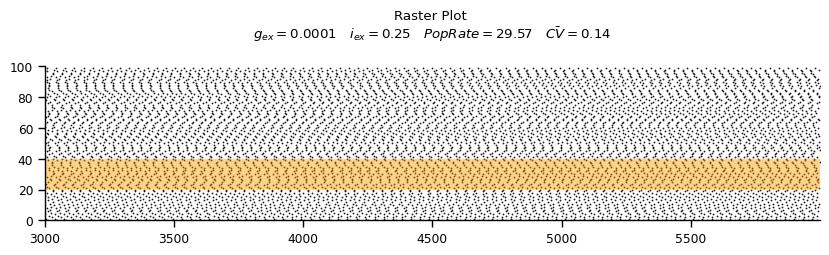

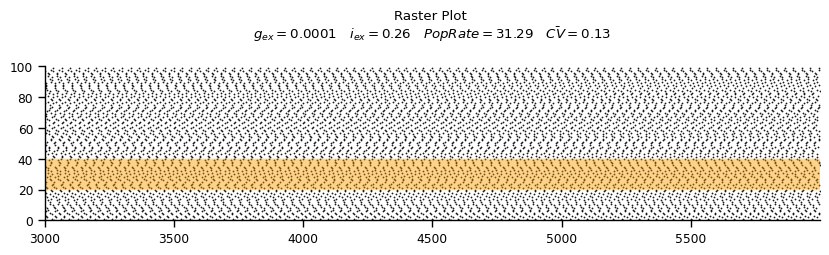

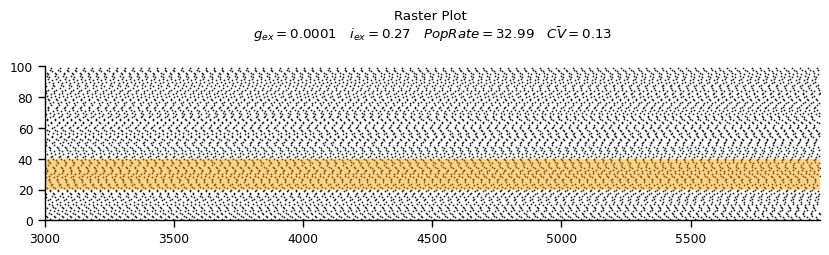

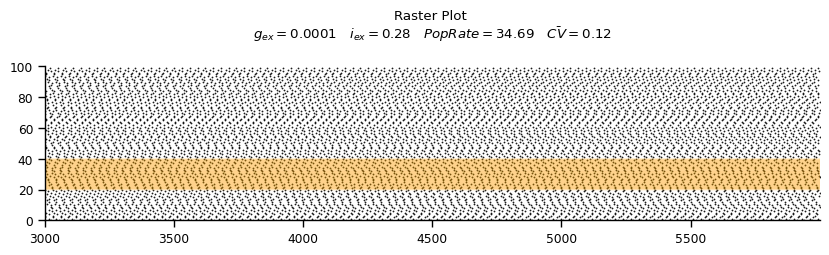

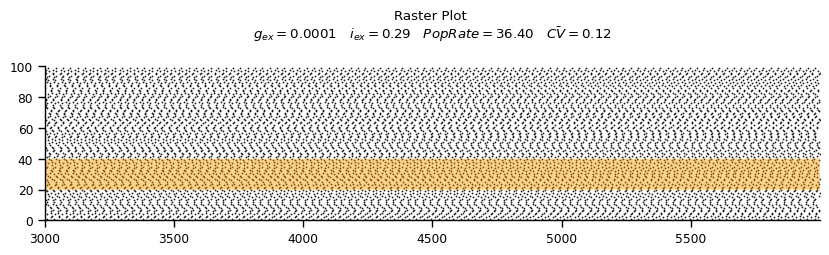

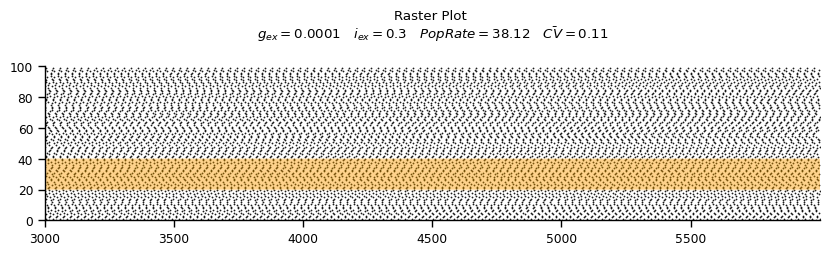

In [2]:
def plotRaster(data):
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    popRates = data['simData']['popRates']['sPY']
    sync = data['sync']['statData'][0][0]
    cv_bar = np.mean(data['CV']['statData'])

    spkid = np.array(data['simData']['spkid'])
    spkt = np.array(data['simData']['spkt'])

    fig, ax = plt.subplots(1,1, figsize=(10,2))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    parameters = r'g_{ex}' + f'={gex}' + '\quad' + r'i_{ex}' + f'={amp}'+ '\quad'+ 'PopRate'+f'={popRates:.2f}'+ '\quad'+'\\bar{CV}'+f'={cv_bar:.2f}'

    plt.title('Raster Plot \n$'+parameters+'$', pad=20)
    for i in np.arange(20,40,0.1):
        plt.hlines(i, 3000, spkt[-1], alpha=0.05, color='orange')
    plt.scatter(y = spkid, x = spkt, s=0.2, color='black')
    plt.xlim(3000, spkt[-1])
    plt.ylim(0,100)
    plt.show()

for data in datas.values():
    plotRaster(data)


In [3]:
mapa = np.zeros((100, len(datas['0.21_0.0001']['simData']['t'])))
for i, value in enumerate(datas['0.21_0.0001']['simData']['V_soma'].values()):
    mapa[i] = value

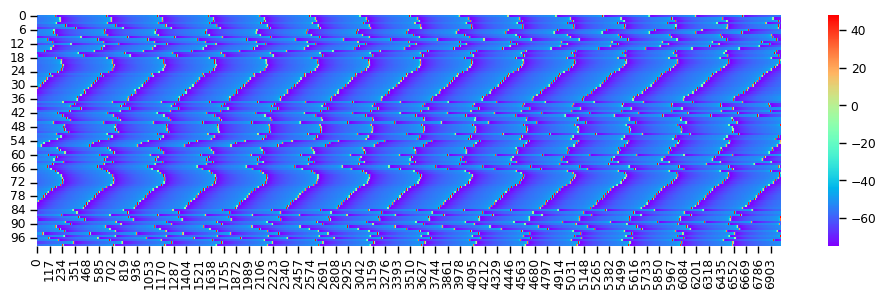

In [4]:
plt.figure(figsize=(12,3))
sns.heatmap(mapa[:,-7000:], cmap='rainbow')
plt.show()

In [6]:
# spkt = datas['0.2_0.0001']['simData']['spkt'][:4000]
# spkid = datas['0.2_0.0001']['simData']['spkid'][:4000]

# for indx, t in enumerate(spkt):
#     if spkid[indx] not in list(range(100,179)):
#         try:
#             teste.loc[t, spkid[indx]] = 1
#         except:
#             print(f"error to add {t},{spkid[indx]}")
#             teste.loc[t, spkid[indx]] = 0

# Plot potential

In [7]:
def plotPotential(data, ti = 0, tf = -1, cell=50):
    #------------------------------------------------------------------------------
    # Set arrays
    #------------------------------------------------------------------------------
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    dur = data['simConfig']['IClamp0']['dur']
    start = data['simConfig']['IClamp0']['start']
    recordStep = data['simConfig']['recordStep']

    voltage = np.array(list(data['simData']['V_soma'].values())[cell])
    time = np.array(data['simData']['t'])
    stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])

    voltage = voltage[ti:tf]
    time = time[ti:tf]
    stim_current = stim_current[ti:tf]

    #------------------------------------------------------------------------------
    # Plot figure
    #------------------------------------------------------------------------------
    f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
    sns.lineplot(x = time, y =voltage, color='black', ax=ax0)
    ax1.plot(time, stim_current, 'gray')

    ax0.set_ylabel('Voltage (mV)')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)

    ax1.plot([0,0],[0,0.15],'k')
    ax1.text(20, 0.125, f'{stim_current.max()}nA',va='center')
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    plt.show()

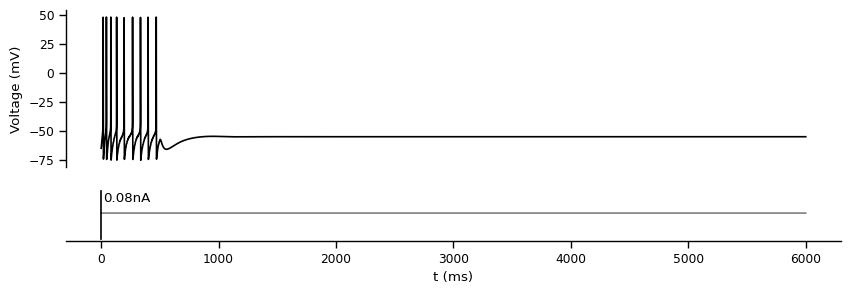

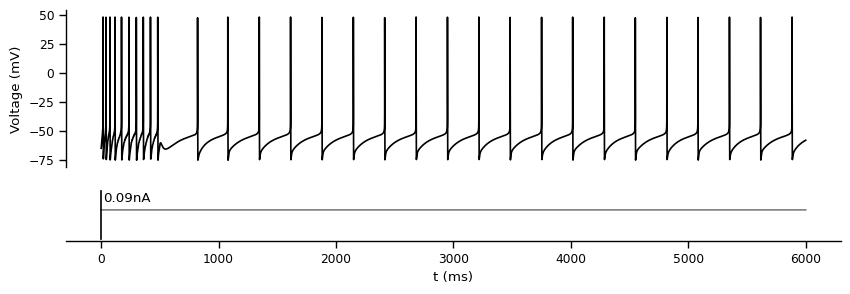

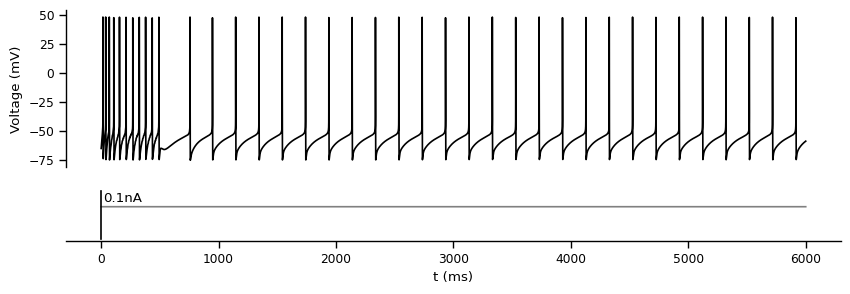

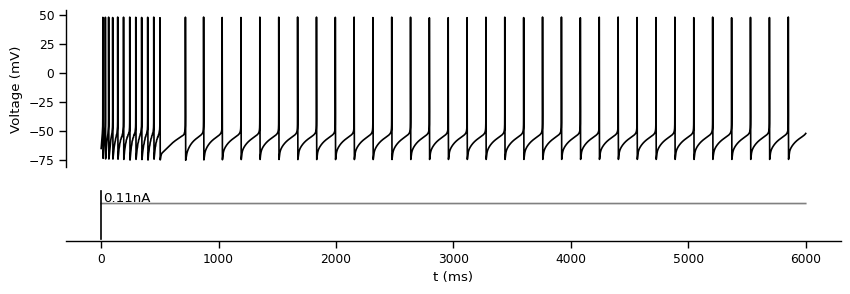

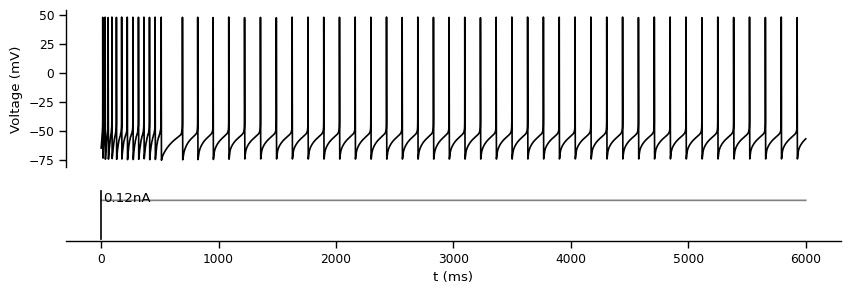

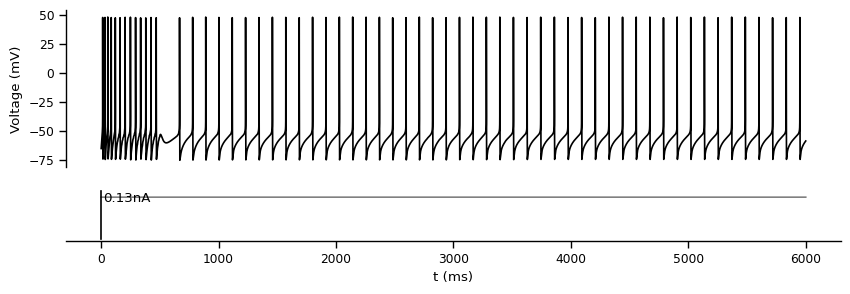

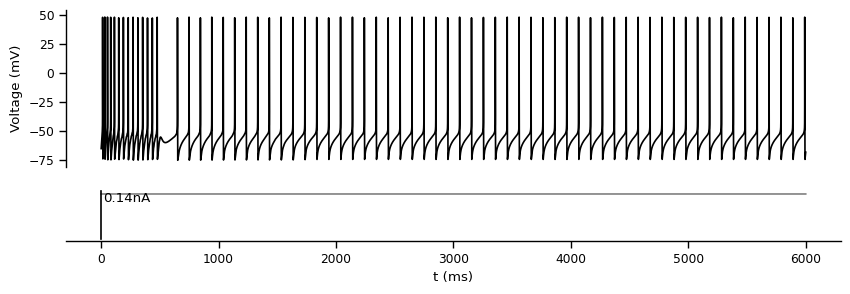

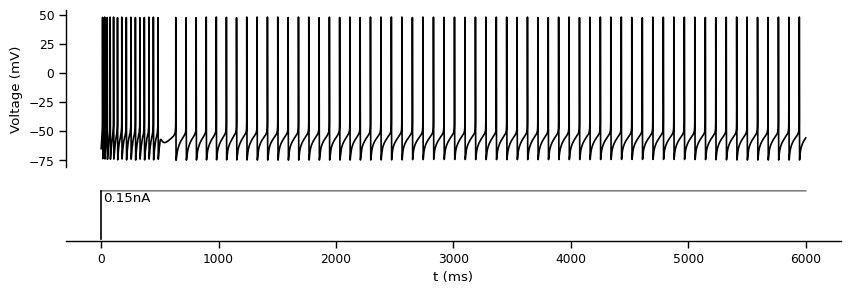

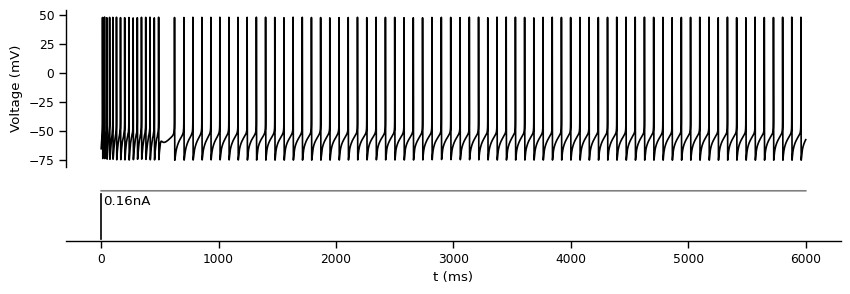

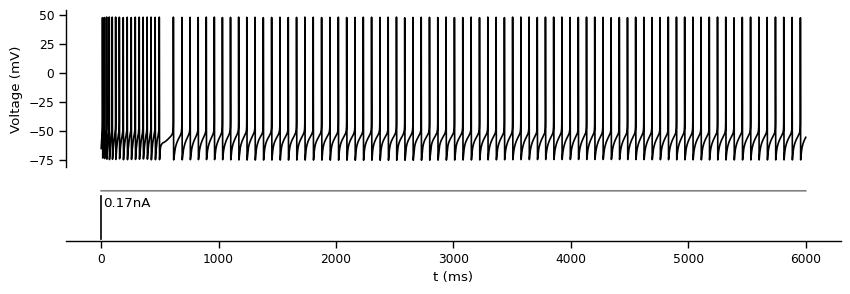

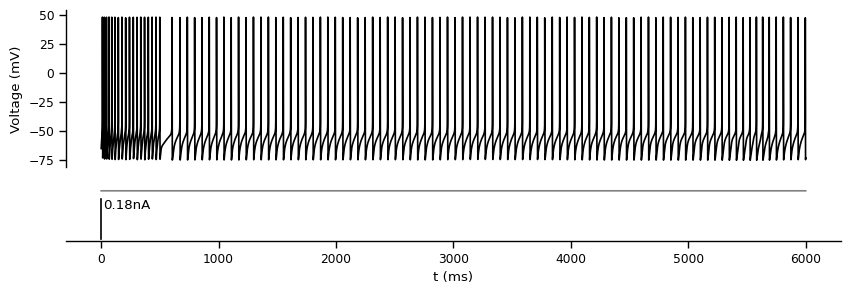

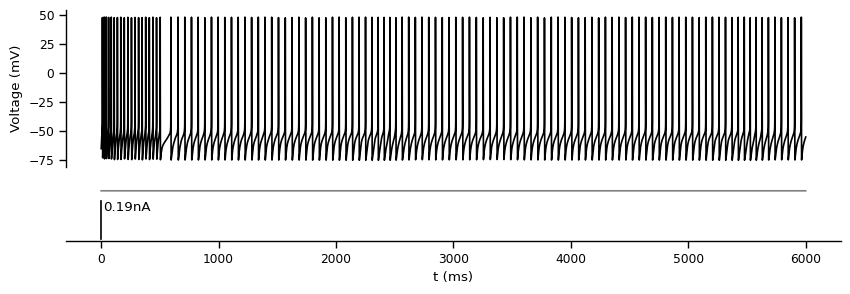

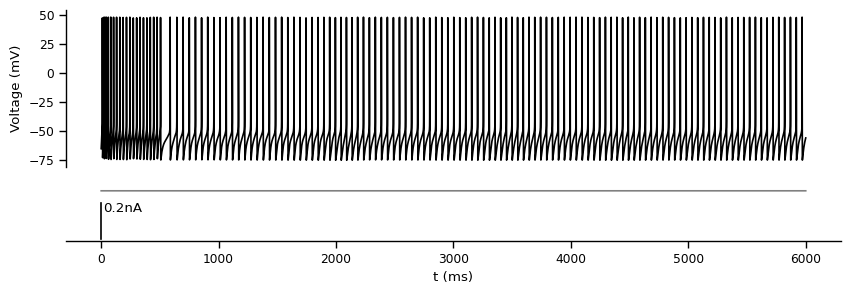

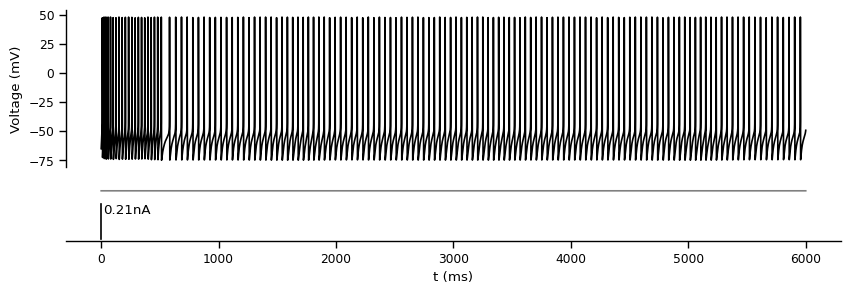

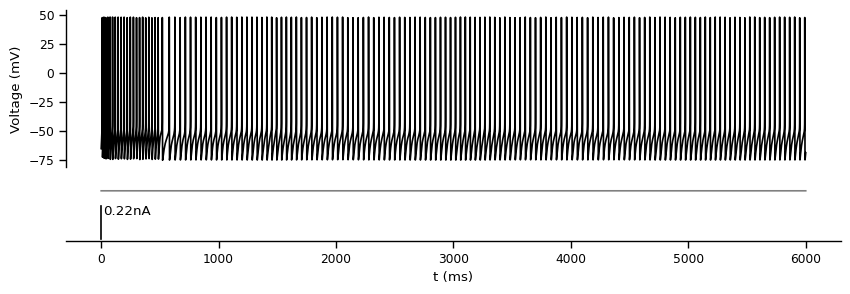

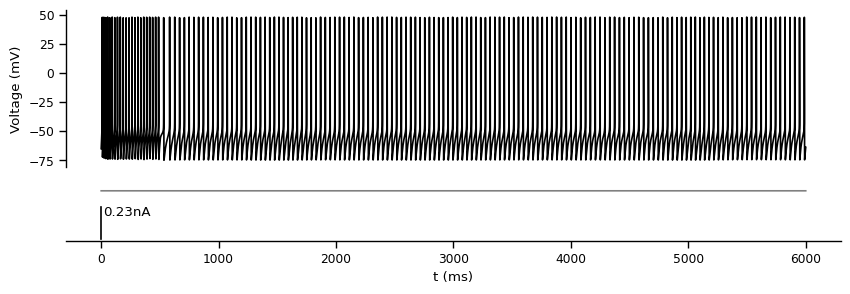

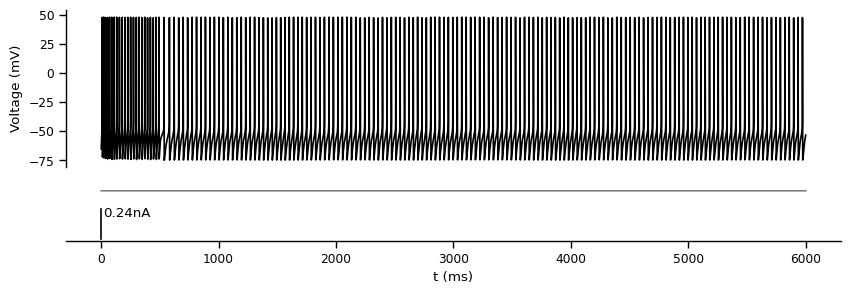

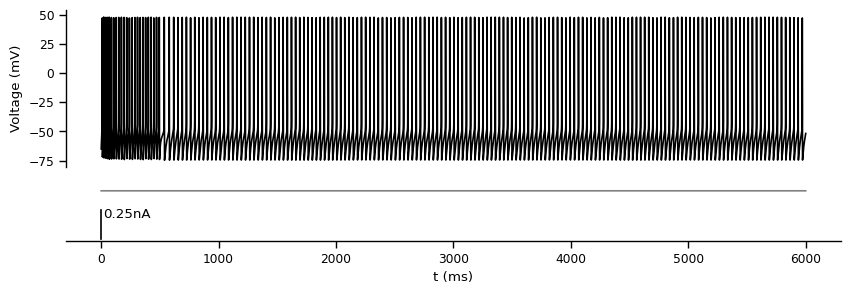

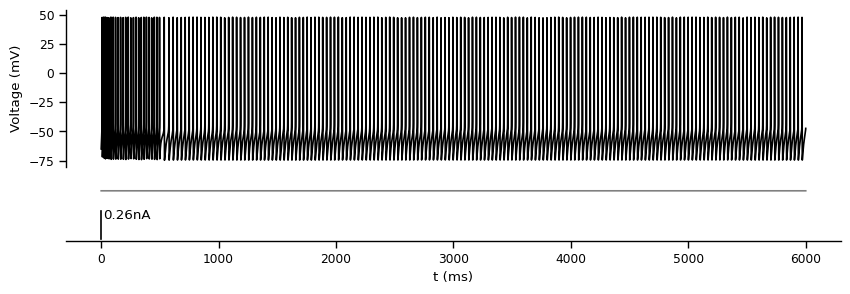

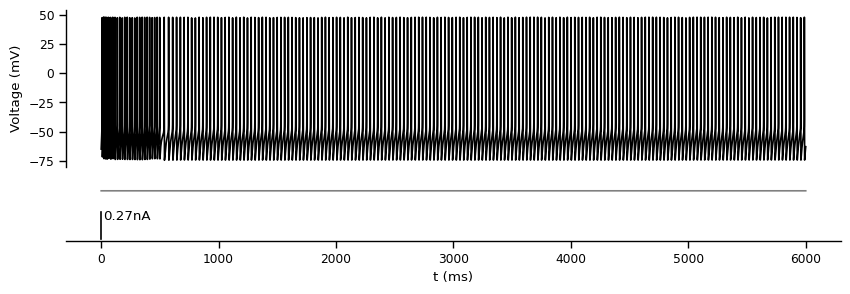

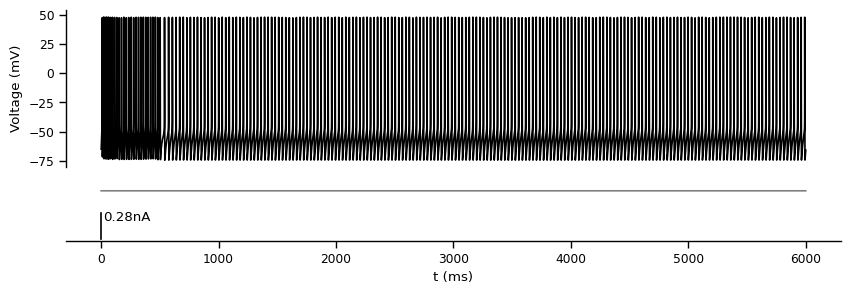

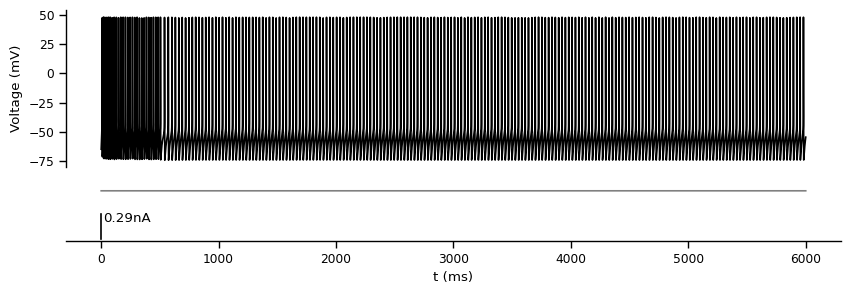

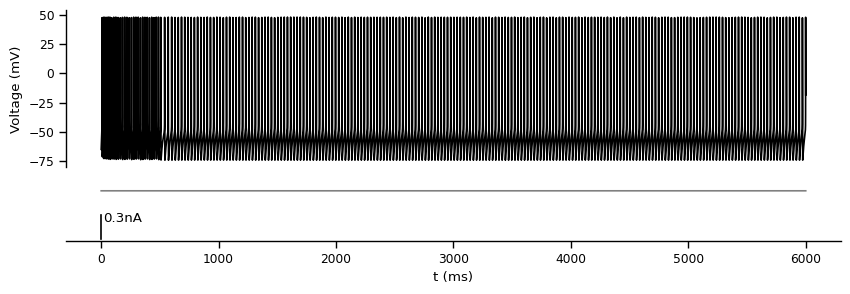

In [8]:
for key, data in datas.items():
    plotPotential(data)

# Aplicar diagnosticos

$$Z_k = | \frac{1}{2\delta} \sum_{|j-k| \le \delta} e^{i\theta_k}|$$

In [9]:
def param_local_order(spatial_pattern, n_neighbors):
    spatial_pattern = np.array(spatial_pattern)
    n = len(spatial_pattern)
    n_neighbors = int(n_neighbors/2)
    real = np.zeros_like(spatial_pattern, dtype='g')
    complx = np.zeros_like(spatial_pattern, dtype='g')
    Zk = np.zeros_like(spatial_pattern, dtype='g')

    for i in range(n):
        for k in range(-n_neighbors, n_neighbors+1):
            if i!=(k+i): # not autoconection
                real[i%n] += np.cos(2*np.pi*spatial_pattern[(k+i)%n]) # real part
                complx[i%n] += np.sin(2*np.pi*spatial_pattern[(k+i)%n]) # img part       
        Zk[i%n] += real[(i)%n]*real[(i)%n] + complx[(i)%n]*complx[(i)%n] # 
        Zk[i%n] = abs((1.0/(2*n_neighbors))*np.sqrt(Zk[i%n])) # len fasor.

    return Zk